<a href="https://colab.research.google.com/github/brayanricardo13/Valoracion-de-Activos/blob/main/Portafolio_Fiduciaria_Bogota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns

In [1]:
from google.colab import files

files.upload()

Saving FIB Formato portafolio diario para envío 6..xlsx to FIB Formato portafolio diario para envío 6..xlsx


In [ ]:
FIB = pd.read_excel("/content/FIB Formato portafolio diario para envío 6..xlsx")

In [ ]:
FIB

In [216]:
Ultimo_Portafolio = FIB.loc[FIB['Fecha'] > "2023-04-11"] 

In [ ]:
Ultimo_Portafolio.tail() 

In [230]:
tabla_dinamica = pd.pivot_table(Ultimo_Portafolio, values='Valor Presente', index='Fecha', columns='Tasa Indexada', aggfunc=np.sum, margins=True, margins_name='Total') \
    .rename(columns={'NO': 'FIC', 'No Tiene': 'AHORROS'}) \
    .drop(index=['Total']) \
    .style.format('{:,.2f}'.format)

In [ ]:
tabla_dinamica

In [232]:
df = tabla_dinamica.data
# Calcular la columna de porcentajes
porcentajes = df.div(df.iloc[:,-1], axis=0).iloc[:,:-1] * 100
porcentajes.columns = [str(col) for col in porcentajes.columns]
# Agregar la columna de porcentajes al DataFrame
df = pd.concat([df, porcentajes], axis=0)
tabla_dinamica = df.style.format('{:,.2f}'.format)
tabla_dinamica

,FS,IB1,IPC,FIC,AHORROS,Total
Fecha,,,,,,
2023-04-12 00:00:00,"9,781,020,000.00","8,868,370,000.00","13,960,400,000.00","12,360,024,254.98","636,831,405.90","45,606,645,660.88"
2023-04-12 00:00:00,21.45,19.45,30.61,27.10,1.40,nan


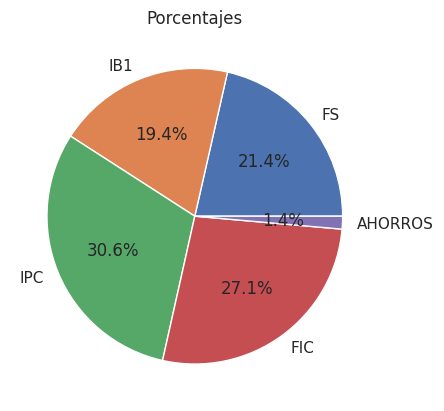

In [233]:
fig, ax = plt.subplots()
ax.pie(porcentajes.iloc[-1], labels=porcentajes.columns, autopct='%1.1f%%')
ax.set_title('Porcentajes')
plt.show()